In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Forecasting Datasets/CBBTCUSD.csv'
btc_data=pd.read_csv(file_path)
btc_data.head()

,DATE,CBBTCUSD
0,2024-05-24,68567.61
1,2024-05-25,69304.60
2,2024-05-26,68474.60
3,2024-05-27,69363.83
4,2024-05-28,68350.32


In [3]:
btc_data['DATE']=pd.to_datetime(btc_data['DATE'])
btc_data.set_index('DATE',inplace=True)
btc_data.head()

,CBBTCUSD
DATE,
2024-05-24,68567.61
2024-05-25,69304.60
2024-05-26,68474.60
2024-05-27,69363.83
2024-05-28,68350.32


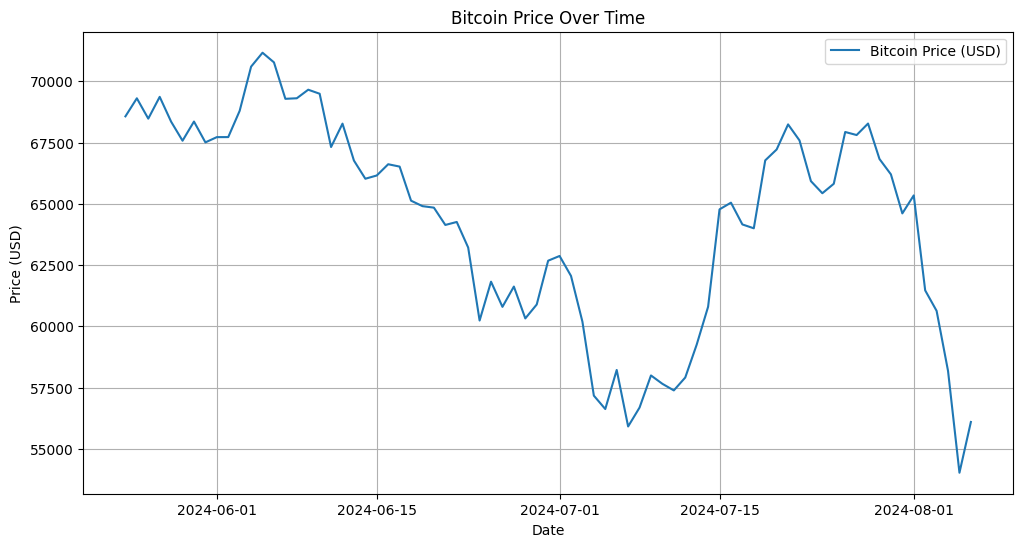

In [4]:
plt.figure(figsize=(12,6))
plt.plot(btc_data.index, btc_data['CBBTCUSD'], label='Bitcoin Price (USD)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
adf_test = adfuller(btc_data['CBBTCUSD'])
adf_result = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
adf_result

,0
Test Statistic,-0.960909
p-value,0.767253
#Lags Used,0.000000
Number of Observations Used,74.000000


In [6]:
btc_data_diff = btc_data.diff().dropna()
adf_test_diff = adfuller(btc_data_diff['CBBTCUSD'])
adf_result_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
adf_result_diff

,0
Test Statistic,-7.709838e+00
p-value,1.272515e-11
#Lags Used,0.000000e+00
Number of Observations Used,7.300000e+01


In [7]:
model = ARIMA(btc_data['CBBTCUSD'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

In [9]:
forecast_dates = pd.date_range(start=btc_data.index[-1], periods=forecast_steps+1)
forecast_series = pd.Series(forecast, index=forecast_dates)
forecast_series

,predicted_mean
2024-08-06,NaN
2024-08-07,56175.158602
2024-08-08,56129.871219
2024-08-09,56156.071828
2024-08-10,56140.913701
2024-08-11,56149.683300
2024-08-12,56144.609727
2024-08-13,56147.544997
2024-08-14,56145.846823
2024-08-15,56146.829286
